In [1]:
%%capture


from ding0.core import NetworkDing0

from ding0.tools.logger import setup_logger
from ding0.tools.results import save_nd_to_pickle

from egoio.tools import db
from sqlalchemy.orm import sessionmaker
import oedialect


import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)



from IPython.display import IFrame
from IPython.display import clear_output

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
%%time

grid_id = 40

# set ID of MV grid district
mv_grid_districts = [grid_id]


# 1.)
# create new network
nd = NetworkDing0(name='network')

# 2.) Connect DB
engine = db.connection(section='oedb_dialect', readonly=True)
session = sessionmaker(bind=engine)()

# 3.a) Run ding0
#nd.run_ding0(session=session,
#             mv_grid_districts_no=mv_grid_districts)

Wall time: 405 ms


In [3]:
%%time


from ding0.tools import results


# 3.b) load grid frmo pickle

#nd.control_circuit_breakers(mode='close')
#save_nd_to_pickle(nd, filename='ding0_grids__40.pkl')
nd = results.load_nd_from_pickle(filename='./config/tmp/ding0_grids__' + str(grid_id) + '.pkl')

Wall time: 1.94 s


In [4]:
# get ids for not-aggregated lv stations
def get_ids_lv_stations_not_aggregated(nd, only_non_aggregated_areas=True):
    
    lv_station_ids_not_aggregated = []
    lv_station_ids_with_aggregated = []

    # add ids for not-aggregated lv stations only
    #if only_non_aggregated_areas:
    for i in range(len(nd._mv_grid_districts[0].mv_grid._graph.nodes())):
        if isinstance(list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[i], LVStationDing0):
            if hasattr(list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[i], 'voltage_res'):
                lv_station_ids_not_aggregated.append(i)
                    
                    
    #else: # add ids for all lv stations 
    for i in range(len(nd._mv_grid_districts[0].mv_grid._graph.nodes())):
        if isinstance(list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[i], LVStationDing0):
            if hasattr(list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[i], 'lv_load_area'):
                if hasattr(list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[i].lv_load_area, 'id_db'):
                    lv_station_ids_with_aggregated.append(i)
    
    return lv_station_ids_not_aggregated, lv_station_ids_with_aggregated


In [5]:
from ding0.core.network.stations import LVStationDing0

In [6]:
lv_station_ids_not_aggregated, lv_station_ids_w_aggregated = get_ids_lv_stations_not_aggregated(nd, only_non_aggregated_areas=True)

In [7]:
len(lv_station_ids_not_aggregated), '+', len(lv_station_ids_w_aggregated), '=', len(lv_station_ids_not_aggregated) + len(lv_station_ids_w_aggregated)

(121, '+', 243, '=', 364)

In [8]:
len(lv_station_ids_w_aggregated), '-', len(lv_station_ids_not_aggregated), '=', len((set(lv_station_ids_not_aggregated)) ^ set(lv_station_ids_w_aggregated))

(243, '-', 121, '=', 122)

In [9]:
# this defines load areas which all together define one aggregated load area
la_agg = list(set(lv_station_ids_not_aggregated) ^ set(lv_station_ids_w_aggregated))
len(la_agg)

122

In [10]:
counter_lv_station=0
count_load_area_in_fn=0
sum_area=0

id_list = []

print('total nodes', len(list(nd._mv_grid_districts[0].mv_grid._graph.nodes())))
    
for i in range(len(list(nd._mv_grid_districts[0].mv_grid._graph.nodes()))):
    
    # only load areas have attribute lv_load_area
    if hasattr(list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[i], 'lv_load_area'):

        if hasattr(list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[i].lv_load_area, 'id_db'):
            temp_id = list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[i].lv_load_area.id_db

            if temp_id not in id_list:

                id_list.append(temp_id)

    if 'LVStation' in str(list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[i]):
        #print(list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[i])
        counter_lv_station+=1
    
'number lv stations', counter_lv_station

total nodes 322


('number lv stations', 243)

In [11]:
lv_load_area_id_db = list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[la_agg[0]].lv_load_area.id_db
lv_load_area       = list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[la_agg[0]].lv_load_area
lv_load_area

lv_load_area_4347

In [12]:
lv_load_area_id_db = list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[la_agg[1]].lv_load_area.id_db
lv_load_area       = list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[la_agg[1]].lv_load_area
lv_load_area

lv_load_area_4347

In [13]:
lv_load_area_id_db = list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[la_agg[100]].lv_load_area.id_db
lv_load_area       = list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[la_agg[100]].lv_load_area
lv_load_area

lv_load_area_4347

In [14]:
'number of districts', len(lv_load_area._lv_grid_districts)

('number of districts', 122)

In [15]:
stations_in_lv_load_area_4347 = []
for lv_grid_district in lv_load_area._lv_grid_districts:
    stations_in_lv_load_area_4347.append(lv_grid_district.lv_grid._station)
    
len(stations_in_lv_load_area_4347)

122

In [16]:
len(set(stations_in_lv_load_area_4347))

122

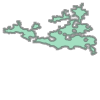

In [17]:
poly = lv_load_area.geo_area
poly

In [18]:
import folium


In [19]:
m = folium.Map([poly.centroid.y, poly.centroid.x], zoom_start=16)
               
mv_geo_area = nd._mv_grid_districts[0].mv_grid.grid_district.geo_data
folium.GeoJson(mv_geo_area).add_to(m)
               
folium.GeoJson(poly).add_to(m)
m

In [20]:
id_list = []


only_not_aggregated = True

if only_not_aggregated:
    agg_lv_load_area_id_db = list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[la_agg[100]].lv_load_area.id_db
    id_list.append(agg_lv_load_area_id_db)

m = folium.Map([poly.centroid.y, poly.centroid.x], zoom_start=16)



plot_mv_geo_poly = True

if plot_mv_geo_poly:
    mv_geo_area = nd._mv_grid_districts[0].mv_grid.grid_district.geo_data
    folium.GeoJson(mv_geo_area).add_to(m)

    
# plot each not aggregated load area
for i in range(len(list(nd._mv_grid_districts[0].mv_grid._graph.nodes()))):
    
    # only load areas have attribute lv_load_area
    if hasattr(list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[i], 'lv_load_area'):

        if hasattr(list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[i].lv_load_area, 'id_db'):
            temp_id = list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[i].lv_load_area.id_db

            if temp_id not in id_list:
                
                poly = list(nd._mv_grid_districts[0].mv_grid._graph.nodes())[i].lv_load_area.geo_area

                # its a unique temp_id
                folium.GeoJson(poly).add_to(m)
                
m